## SisFall Exploratory Data Analysis
##### Matthew Johnson, July 19-22, 2018

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import glob
import time
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/mattjohnson/Desktop/Python 2018/Untitled Folder/SubjectDataFrames/acm_SA01.csv')
data = data.drop('Unnamed: 0', axis=1)
df = data[ ['x1', 'y1', 'z1', 'activity', 'subject', 'trial']]

Titles for plotting:

In [2]:
fall_titles = ['Fall forward while walking caused by a slip', 'Fall backward while walking caused by a slip', 
    'Lateral fall while walking caused by a slip', 'Fall forward while walking caused by a trip', 
    'Fall forward while jogging caused by a trip', 'Vertical fall while walking caused by fainting',
    'Fall while walking, with use of hands in a table to dampen fall, caused by fainting'
    'Fall forward when trying to get up', 'Lateral fall when trying to get up', 
    'Fall forward when trying to sit down', 'Fall backward when trying to sit down', 'Lateral fall when trying to sit down',
    'Fall forward while sitting, caused by fainting or falling asleep',
    'Fall backward while sitting, caused by fainting or falling asleep',
    'Lateral fall while sitting, caused by fainting or falling asleep']

adl_titles = ['Walking slowly', 'Walking quickly', 'Jogging slowly', 'Jogging quickly', 'Walking upstairs and downstairs slowly',
    'Walking upstairs and downstairs quickly','Slowly sit in a half height chair, wait a moment, and up slowly',
    'Quickly sit in a half height chair, wait a moment, and up quickly',
    'Slowly sit in a low height chair, wait a moment, and up slowly','Quickly sit in a low height chair, wait a moment, and up quickly',
    'Sitting a moment, trying to get up, and collapse into a chair',
    'Sitting a moment, lying slowly, wait a moment, and sit again','Sitting a moment, lying quickly, wait a moment, and sit again',
    'Being on oneís back change to lateral position, wait a moment, and change to oneís back',
    'Standing, slowly bending at knees, and getting up', 'Standing, slowly bending without bending knees, and getting up',
    'Standing, get into a car, remain seated and get out of the car','Stumble while walking',
    'Gently jump without falling (trying to reach a high object)']

Plotting and filtering methods:

In [193]:
fs = 200.0

def get_trial_time(index, kind):
    
    r=5
    if kind == 'f':
        n = 3000.0
        t = np.linspace(0, 15.0,n, endpoint=False)
    else:
        if index in list(range(0,4)):
            T = 100 # seconds
        elif index in [4, 5, 16]:
            T = 25 
        else: T = 12
        
        n = int(T * fs) # total number of samples
        t = np.linspace(0, T, n, endpoint=False)
                
        if index <= 3: 
            r = 1 
        
    return t, int(n), int(r)
    
## index w <-- activity = F[w+1], eg. index=4 gives a df that contains activity F05 
## This makes sense since data_list[0] contains activity F01

def plot_trials(index, kind):
    
    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
                
    new_df = correctList[index]
    
    t, n, r = get_trial_time(index, kind)
    plt.figure(figsize=( 15, 2*r))

    for i in range(0,r):
        curr_df = new_df[i*n:i*n+n]
        if len(curr_df) != n:
            curr_df = curr_df.append(curr_df.iloc[len(curr_df)-1])
        plt.subplot(r, 1, i+1)
        plt.plot(t, curr_df['bx'], 'b-', label='x')
        plt.plot(t, curr_df['by'], 'r-', label='y')
        plt.plot(t, curr_df['bz'], 'y-', label='z')
        plt.grid()
        plt.legend()
        plt.ylabel('Acc')
        if i == 0: plt.title( correctCodes[index] + ' ' + correctTitles[index])

    plt.subplots_adjust(hspace=0.35)
    plt.show()
    
def plot_one_from_each(index, kind):
    
    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
            
    plt.figure(figsize=(15,10))
        
        
    for i in range(0,5):
        if (index+i+1)==len(correctList): return
        new_df = correctList[index+i]
        t, n, r = get_trial_time(index, kind)

        try:
            curr_df = new_df[0:n]
            if len(curr_df) != n:
                curr_df = curr_df.append(curr_df.iloc[len(curr_df)-1])
            plt.subplot(5, 1, i+1)
            plt.plot(t, curr_df['ax'], 'b-', label='x')
            plt.plot(t, curr_df['ay'], 'r-', label='y')
            plt.plot(t, curr_df['az'], 'y-', label='z')
            plt.grid()
            plt.legend()
            plt.ylabel('Acc')
            plt.title( correctCodes[index + i] + ' ' + correctTitles[index + i])
        except:
            print('')
            
    plt.subplots_adjust(hspace=0.4)
    plt.show()    
    
def plot_feats(index, kind):

    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
        
    t, n, r = get_trial_time(index, kind)
    
    curr_df = correctList[index][0:int(n)]
    feat_list = ['vm', 'horiz_mag', 'vert', 'std_mag', 'horiz_std_mag', 'peak_diff', 'HorizSigMagArea']
    colour_list = ['b-', 'r-', 'k-', 'c-', 'C2', 'C4', 'C1']

    plt.figure(figsize=(15,10))

    
    for i, feat, colour in zip(range(0,7), feat_list, colour_list):
        plt.subplot(7, 1, i+1)
        plt.plot(t, curr_df[feat], colour, label=feat)
        plt.grid()
        plt.legend()
        plt.ylabel(feat)
        if i==0: plt.title( correctCodes[index] + ' ' + correctTitles[index])

    plt.subplots_adjust(hspace=0.35)
    plt.show()
    
from scipy.signal import butter, lfilter, freqz
# Filter requirements.
order = 4
fs = 200.0       # sample rate, Hz
cutoff = 5.0  # desired cutoff frequency of the filter, Hz

# From??????
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [4]:
dailies = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','Da10','D11','D12','D13','D14','D15',
 'D16','D17','D18','D19']
falls = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10','F11','F12','F13','F14','F15']

adl_list = []
fall_list = []

for d in dailies:
    tempdf = df[ df['activity']==d]
    adl_list.append(tempdf)
    
for f in falls:
    tempdf = df[ df['activity']==f]
    fall_list.append(tempdf)

Low pass butterworth filtering (cutoff?) (order=4), removing bias from data, i.e. a[k] = a[k]-a[k-1] where a[k] = [xa, ya, za].T. <br>
Feature extraction and engineering.

In [272]:
trials = ['R03', 'R01', 'R04', 'R02', 'R05']
fall_df_list = []
adl_df_list = []
        
def prepare_data(kind):
        
    if kind == 'f': 
            putList, takeList = fall_df_list, fall_list
    else: 
            putList, takeList = adl_df_list, adl_list
        
    start = time.time()
    
    for i in range(0,len(takeList)):        
        
        my_df = takeList[i].copy()
        
        new_df = pd.DataFrame()

    
        for trial in trials:
    
            # Get relevant trial data
            trial_df = my_df[ my_df['trial']==trial ]
    
            tempdf = pd.DataFrame()
            # Low Pass Buttersworth Filter and remove bias
            tempdf['ax'], tempdf['ay'], tempdf['az'] = trial_df['x1'], trial_df['y1'], trial_df['z1']
            #temp_bx = pd.Series(butter_lowpass_filter( tempdf['ax'], cutoff, fs, order)).diff()
            tempdf = tempdf.reset_index(drop=True)
            tempdf['fx'] = pd.Series(butter_lowpass_filter( trial_df['x1'], cutoff, fs, order))
            tempdf['fy'] = pd.Series(butter_lowpass_filter( trial_df['y1'], cutoff, fs, order))
            tempdf['fz'] = pd.Series(butter_lowpass_filter( trial_df['z1'], cutoff, fs, order))
            tempdf['bx'] = tempdf['fx'].diff()
            tempdf['by'] = tempdf['fy'].diff()
            tempdf['bz'] = tempdf['fz'].diff()

            tempdf['y_roll'] = pd.Series(tempdf['by'].rolling(200).mean())
            tempdf['fy_roll'] = pd.Series(tempdf['fy'].rolling(200).mean())

            tempdf['bx_std'] = pd.rolling_std(tempdf['bx'], 200)
            tempdf['by_std'] = pd.rolling_std(tempdf['by'], 200)
            tempdf['bz_std'] = pd.rolling_std(tempdf['bz'], 200)
            tempdf['fx_std'] = pd.rolling_std(tempdf['fx'], 200)
            tempdf['fy_std'] = pd.rolling_std(tempdf['fy'], 200)
            tempdf['fz_std'] = pd.rolling_std(tempdf['fz'], 200)
        
            tempdf['xsum'] = pd.expanding_sum(((abs(tempdf['ax']).rolling(2).sum()/2)*(1/200)).fillna(0))
            tempdf['ysum'] = pd.expanding_sum(((abs(tempdf['ay']).rolling(2).sum()/2)*(1/200)).fillna(0))
            tempdf['zsum'] = pd.expanding_sum(((abs(tempdf['az']).rolling(2).sum()/2)*(1/200)).fillna(0))
            tempdf['time'] = 1/200
            tempdf['time'] = pd.expanding_sum(tempdf['time'])
            # C10 Signal Magnitude Area
            tempdf['SigMagArea'] = (tempdf['xsum'] + tempdf['ysum'] + tempdf['zsum']) / tempdf['time']
            # C11
            tempdf['HorizSigMagArea'] = (tempdf['xsum'] + tempdf['zsum']) / tempdf['time']
            
            tempdf['vm'] = np.sqrt( tempdf['fx']**2 + tempdf['fy']**2 + tempdf['fz']**2 )
            # Maximum peak to peak acceleration amplitude
            tempdf['Amax'] = (tempdf['vm'].rolling(200).max())
            tempdf['Amin'] = (tempdf['vm'].rolling(200).min())
            # C3
            tempdf['peak_diff'] = tempdf['Amax']-tempdf['Amin']
    
            tempdf = pd.concat([tempdf.reset_index(drop=True), trial_df[['activity', 'subject', 'trial']].reset_index(drop=True)], axis=1)
            new_df = pd.concat([new_df.reset_index(drop=True), tempdf])
        
        new_df['vector_mag2'] = np.sqrt( new_df['bx']**2 + new_df['by']**2 + new_df['az']**2 )
        new_df['vector_mag'] = np.sqrt( new_df['fx']**2 + new_df['fy']**2 + new_df['fz']**2 )

        new_df['horiz_mag2'] = np.sqrt( new_df['bx']**2 + new_df['bz']**2 )
        # C2
        new_df['horiz_mag'] = np.sqrt( new_df['fx']**2 + new_df['fz']**2 )

        new_df['vert'] = new_df['by'] - new_df['y_roll']
        new_df['vert2'] = new_df['ay'] - new_df['y_roll']
        new_df['vert3'] = new_df['fy'] - new_df['fy_roll']
        # C9
        new_df['std_mag'] = np.sqrt( new_df['fx_std']**2 + new_df['fy_std']**2 + new_df['fz_std']**2 )
        new_df['std_mag2'] = np.sqrt( new_df['bx_std']**2 + new_df['by_std']**2 + new_df['bz_std']**2 )
        # C8
        new_df['horiz_std_mag'] = np.sqrt( new_df['fx_std']**2 + new_df['fz_std']**2 )
        new_df['horiz_std_mag2'] = np.sqrt( new_df['bx_std']**2 + new_df['bz_std']**2 )

        putList.append(new_df)

    print ('Completed... It took', time.time()-start, 'seconds.')

In [273]:
prepare_data('f')
prepare_data('d')

Completed... It took 1.7898719310760498 seconds.
Completed... It took 2.4275870323181152 seconds.


#### To get a feel for the variation in trials, we plot out all 5 trials in a few falling activities:

#### F01: Fall forward while walking caused by a slip

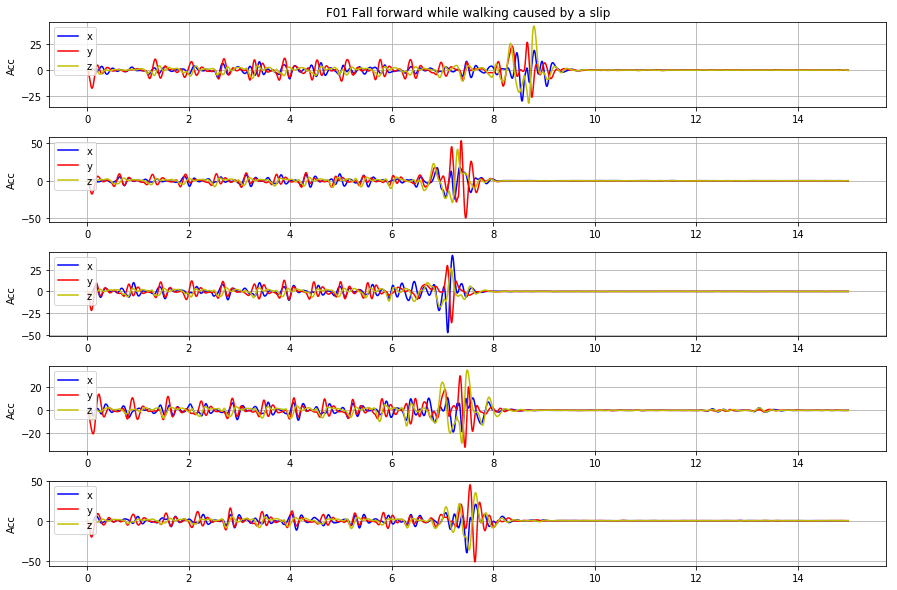

In [274]:
plot_trials(0,'f');

### Each adult has 5 trials of 15s recoded at 200Hz per activity.

#### F02: Fall backward while walking caused by a slip

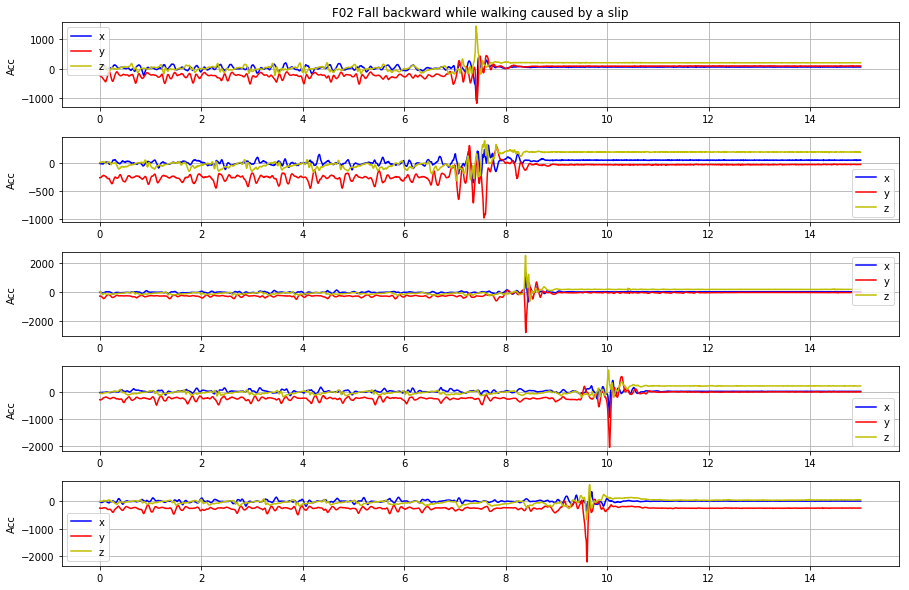

In [164]:
plot_trials( 1, 'f')

#### F03: Lateral fall while walking caused by a slip

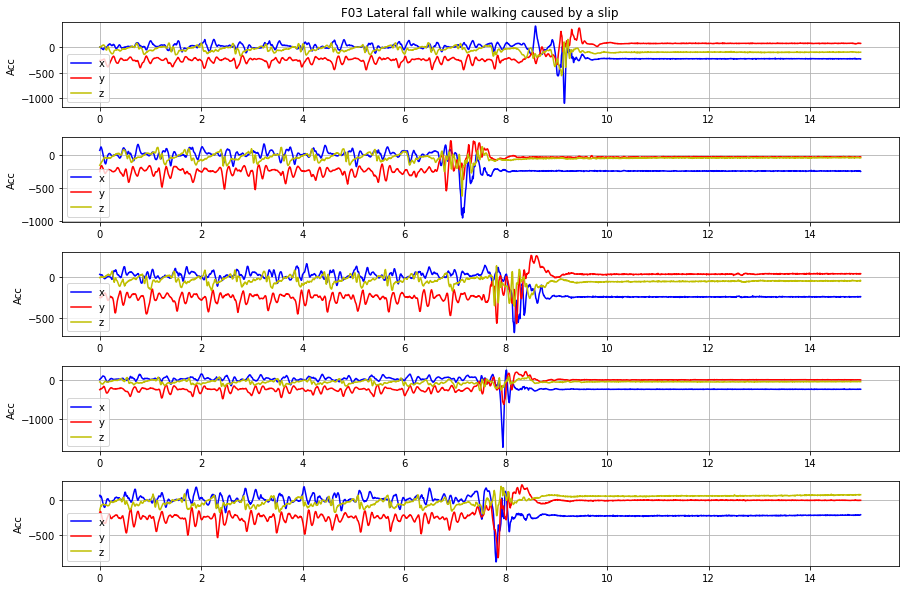

In [165]:
plot_trials(2, 'f');

#### F04: Fall forward while walking caused by a trip

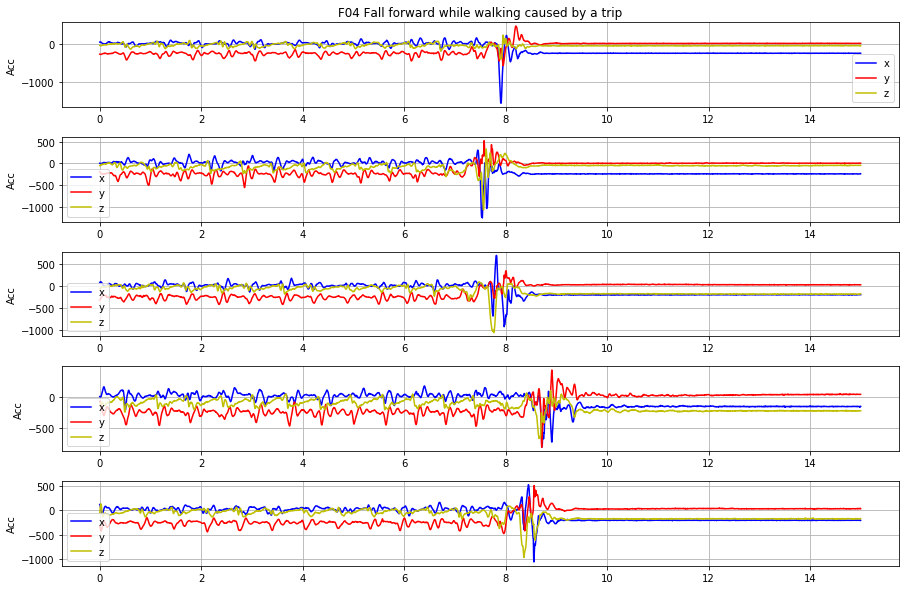

In [166]:
plot_trials(3, 'f');

In [212]:
# plot_trials( data_list, 4, 'Fall forward while walking caused by a slip [F05-SA01]')
# temp fix was: curr_df = new_df[4*n-1:5*n]

#### Let's try plotting just one sample from the rest of the falls to get an idea of what we're working with.

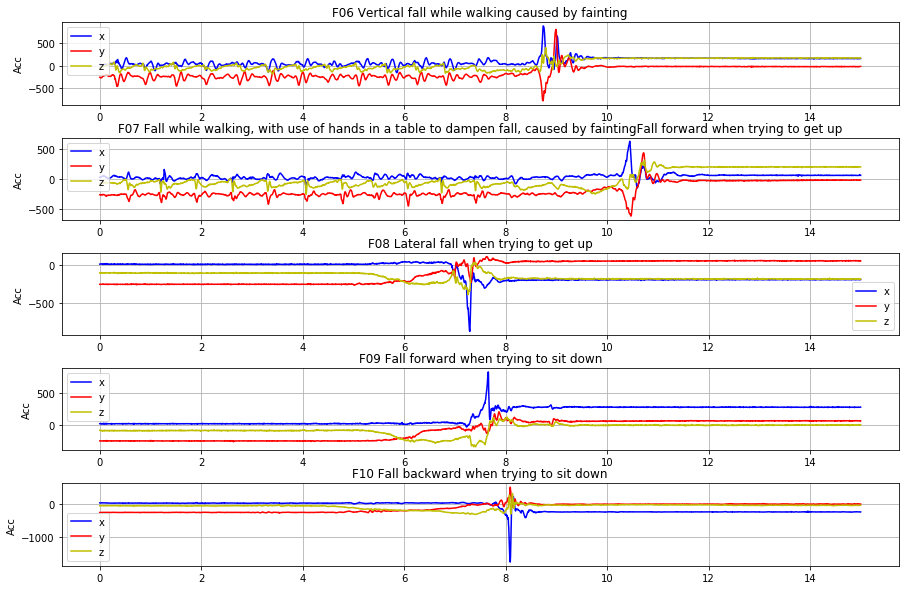

In [167]:
plot_one_from_each(5, 'f')

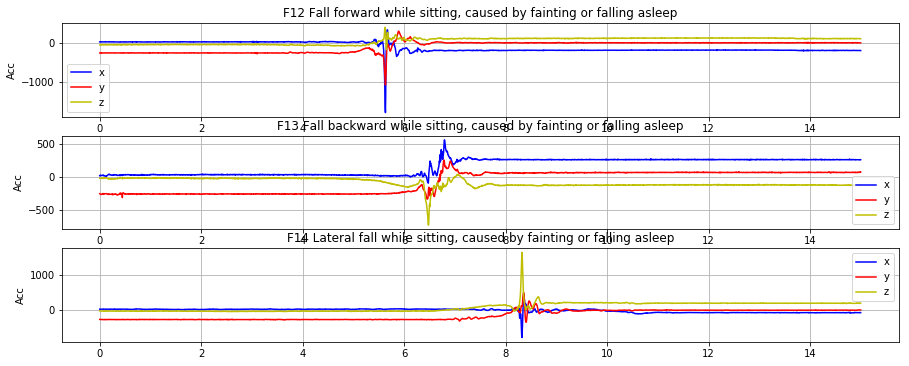

In [168]:
plot_one_from_each(11, 'f')

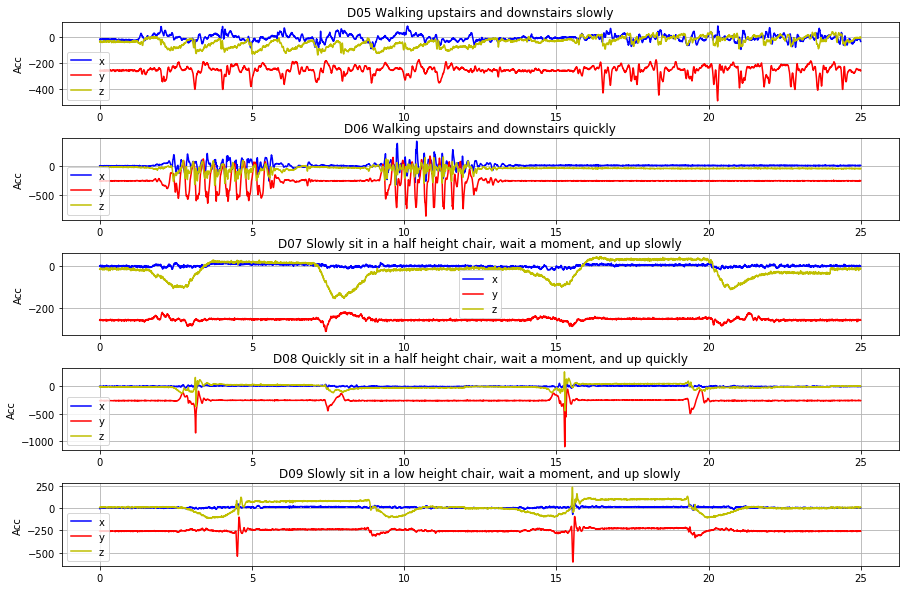

In [169]:
plot_one_from_each(4, 'a' )

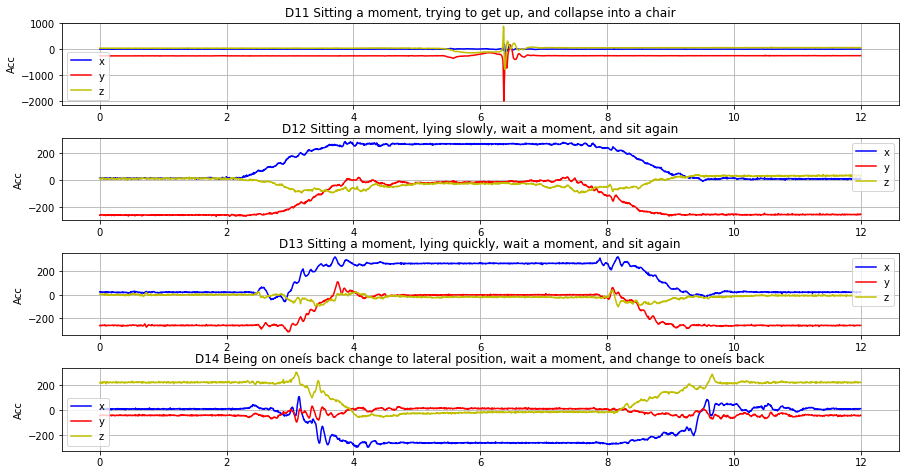

In [174]:
plot_one_from_each(9, 'a' )

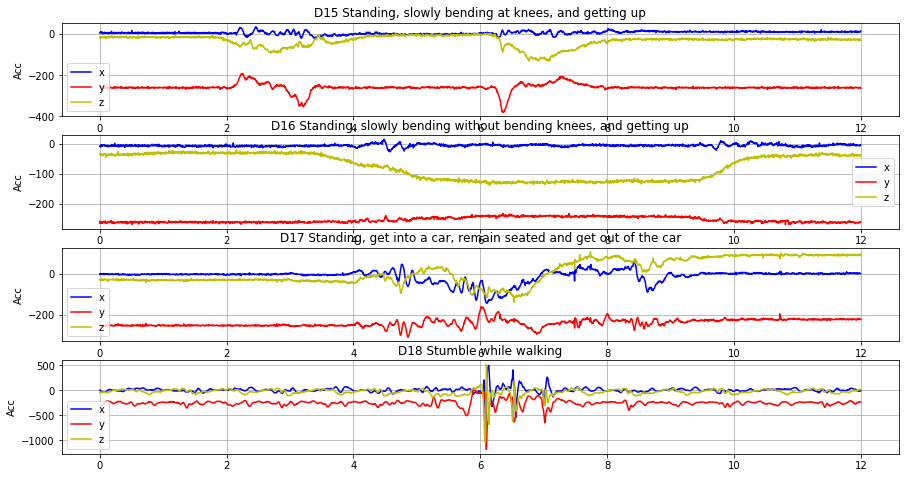

In [175]:
plot_one_from_each(14, 'a' );

### Plotting additional features
#### Daily activities

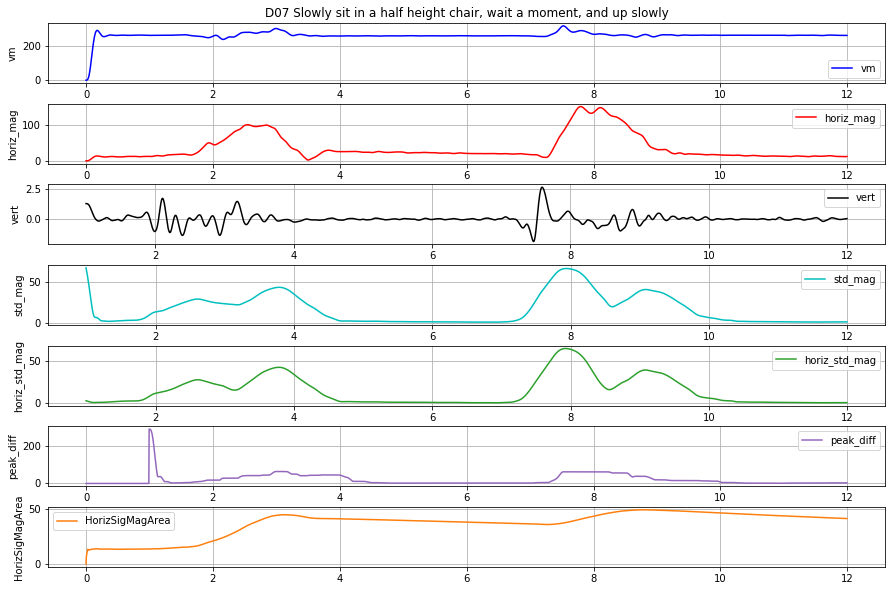

In [260]:
plot_feats(6, 'a')

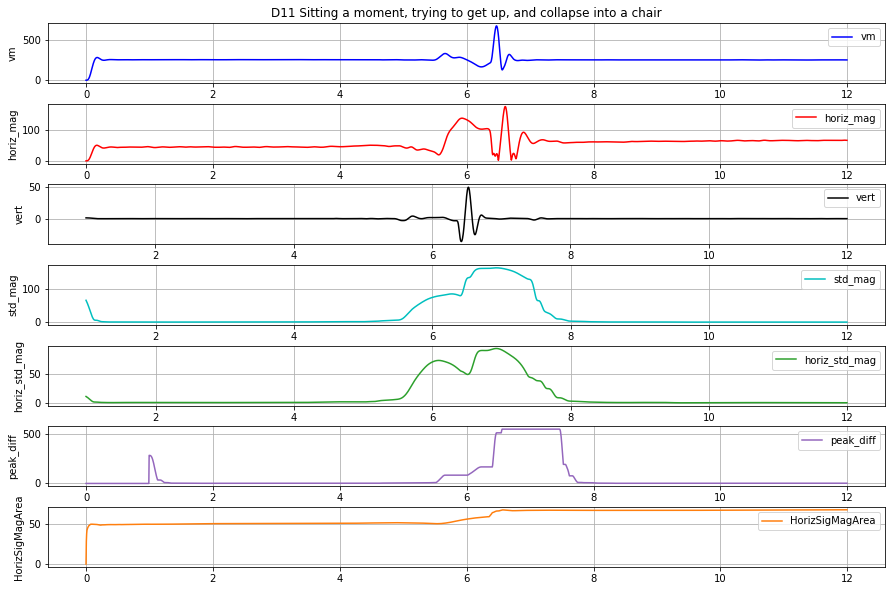

In [258]:
plot_feats(10, 'a')

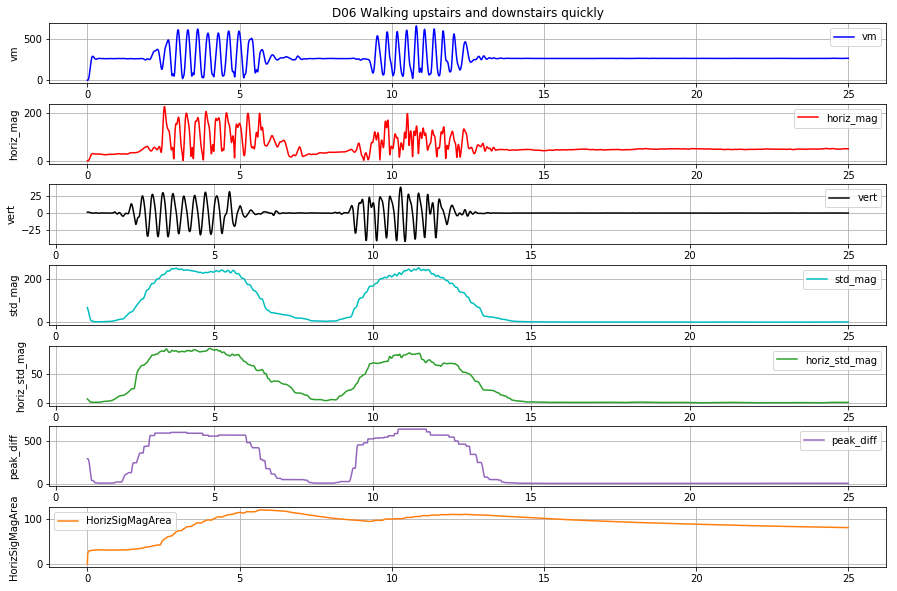

In [275]:
plot_feats(5, 'a')

#### Falls

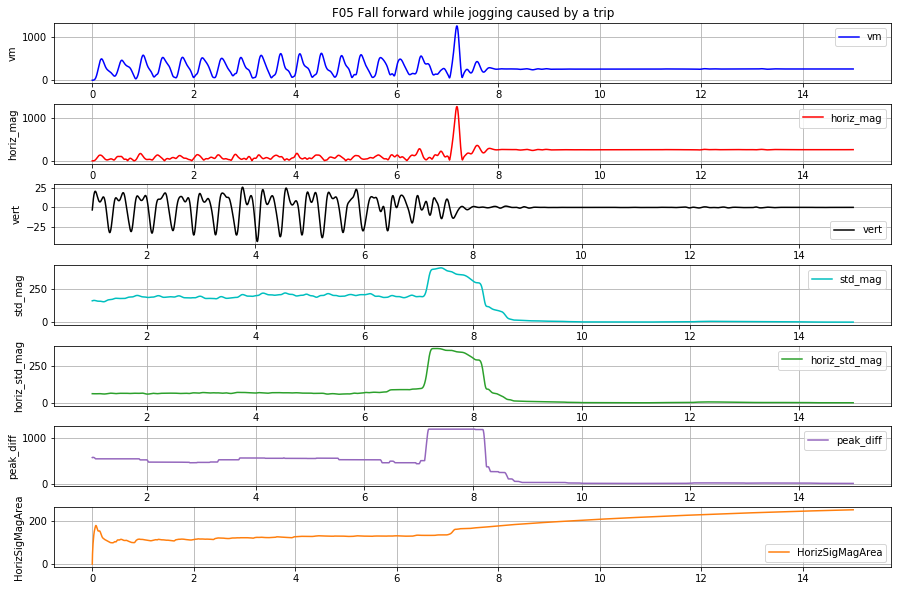

In [276]:
plot_feats(4, 'f')

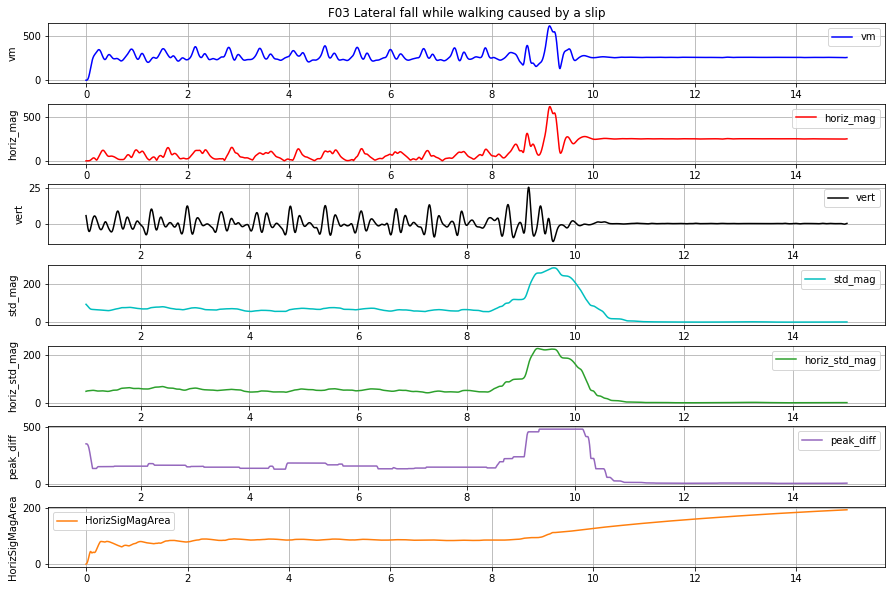

In [277]:
plot_feats(2, 'f')

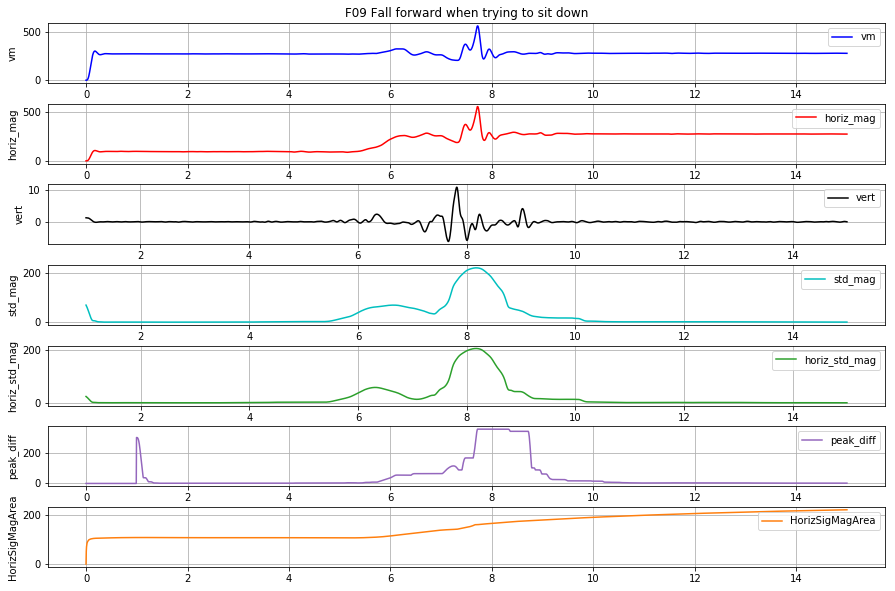

In [255]:
plot_feats(8, 'f')

#### All together now

In [278]:
fall_df = pd.concat(fall_df_list)
dfl_df = pd.concat(adl_df_list)
all_df = pd.concat([fall_df, dfl_df])
all_df_z = all_df.fillna(0)
all_df_z.head()

# List Comprehension
all_df['Fall'] = [1 if x in falls else -1 for x in all_df['activity']]

In [282]:
all_df.columns

Index(['ax', 'ay', 'az', 'fx', 'fy', 'fz', 'bx', 'by', 'bz', 'y_roll',
       'fy_roll', 'bx_std', 'by_std', 'bz_std', 'fx_std', 'fy_std', 'fz_std',
       'xsum', 'ysum', 'zsum', 'time', 'SigMagArea', 'HorizSigMagArea', 'vm',
       'Amax', 'Amin', 'peak_diff', 'activity', 'subject', 'trial',
       'vector_mag2', 'vector_mag', 'horiz_mag2', 'horiz_mag', 'vert', 'vert2',
       'vert3', 'std_mag', 'std_mag2', 'horiz_std_mag', 'horiz_std_mag2',
       'Fall'],
      dtype='object')

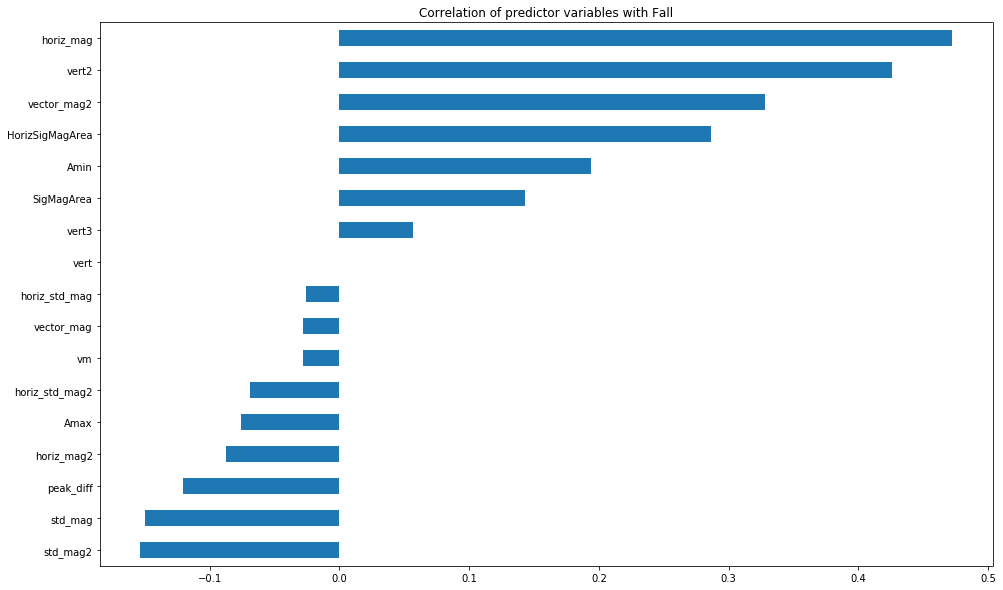

In [283]:
corr = all_df[['SigMagArea', 'HorizSigMagArea', 'vm',
       'Amax', 'Amin', 'peak_diff', 'activity', 'subject', 'trial',
       'vector_mag2', 'vector_mag', 'horiz_mag2', 'horiz_mag', 'vert', 'vert2',
       'vert3', 'std_mag', 'std_mag2', 'horiz_std_mag', 'horiz_std_mag2',
       'Fall']].corr()['Fall']
corr_rank = corr.sort_values(ascending=False)

plt.subplots(figsize=(16,10))

crH = corr_rank.sort_values(ascending=True)
crH[:-1].plot(kind='barh')
plt.title('Correlation of predictor variables with Fall');

0.6311752796173096


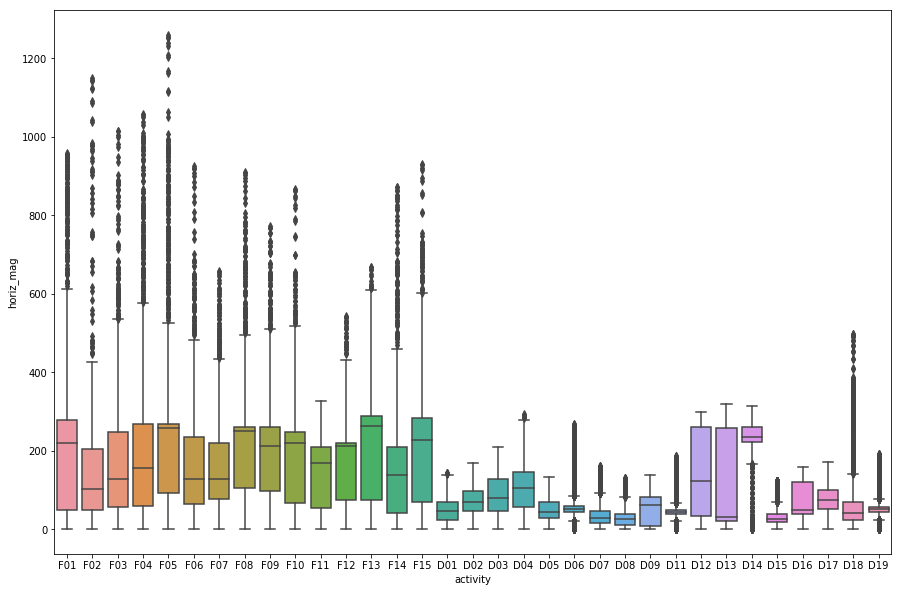

In [280]:
start = time.time()

a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='horiz_mag', data=all_df);

print ( time.time() - start)

0.5355570316314697


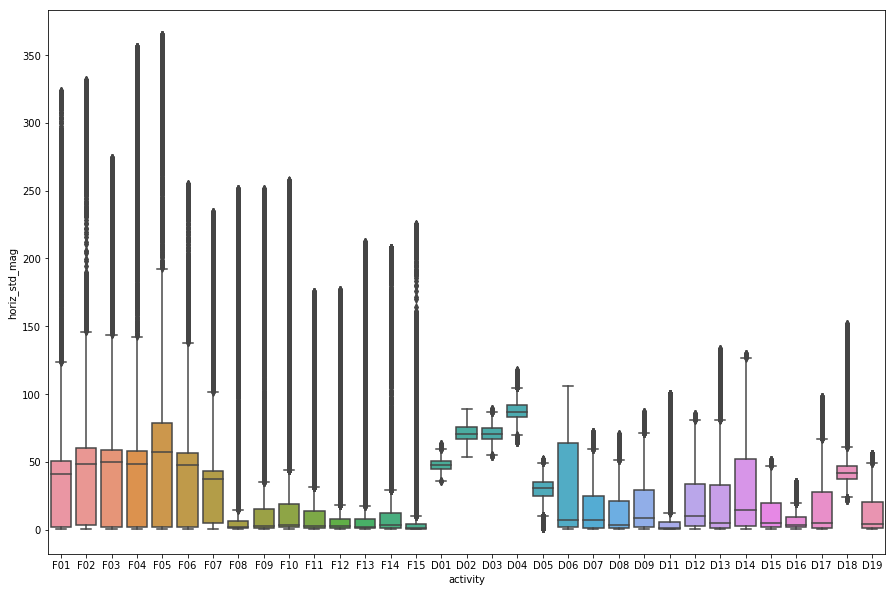

In [281]:
start = time.time()

a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='horiz_std_mag', data=all_df);

print ( time.time() - start)